<a href="https://colab.research.google.com/github/Rmkh77/Flower-Identification/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


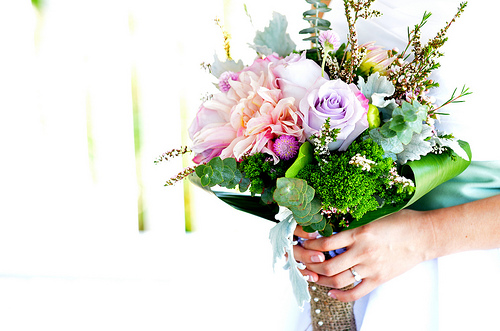

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

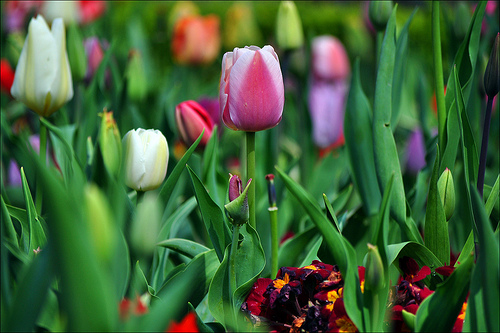

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


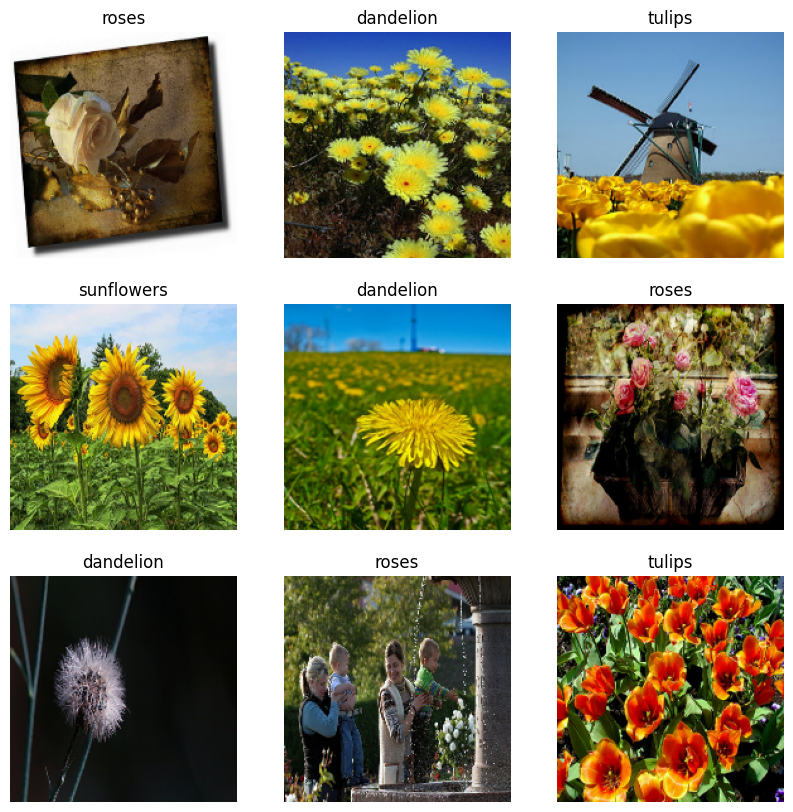

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9810147


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 137s 1s/step - loss: 1.3969 - accuracy: 0.4091 - val_loss: 1.1169 - val_accuracy: 0.5450
Epoch 2/10
92/92 [==============================] - 107s 1s/step - loss: 1.0110 - accuracy: 0.6124 - val_loss: 1.0098 - val_accuracy: 0.5981
Epoch 3/10
92/92 [==============================] - 105s 1s/step - loss: 0.8128 - accuracy: 0.6860 - val_loss: 0.8970 - val_accuracy: 0.6471
Epoch 4/10
92/92 [==============================] - 107s 1s/step - loss: 0.6073 - accuracy: 0.7817 - val_loss: 0.9018 - val_accuracy: 0.6703
Epoch 5/10
92/92 [==============================] - 106s 1s/step - loss: 0.3892 - accuracy: 0.8546 - val_loss: 1.0615 - val_accuracy: 0.6431
Epoch 6/10
92/92 [==============================] - 115s 1s/step - loss: 0.2387 - accuracy: 0.9227 - val_loss: 1.0590 - val_accuracy: 0.6553
Epoch 7/10
92/92 [==============================] - 109s 1s/step - loss: 0.1307 - accuracy: 0.9612 - val_loss: 1.3601 - val_accuracy: 0.6403
Epoch 8/10
92

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)


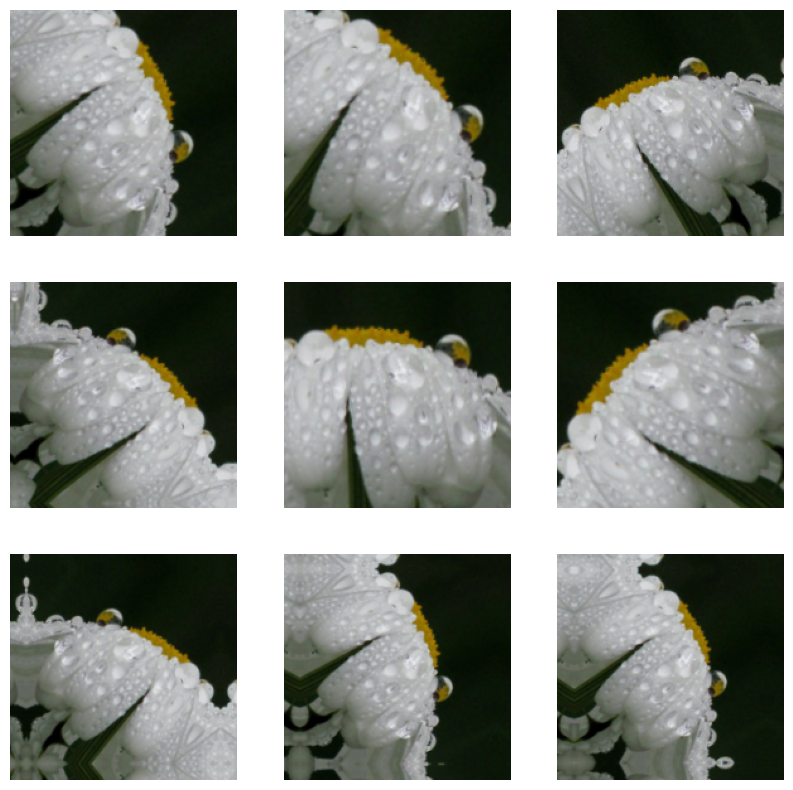

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 121s 1s/step - loss: 1.2631 - accuracy: 0.4581 - val_loss: 1.1348 - val_accuracy: 0.5395
Epoch 2/15
92/92 [==============================] - 122s 1s/step - loss: 1.0784 - accuracy: 0.5651 - val_loss: 1.0830 - val_accuracy: 0.5599
Epoch 3/15
92/92 [==============================] - 124s 1s/step - loss: 0.9819 - accuracy: 0.6121 - val_loss: 1.0135 - val_accuracy: 0.5995
Epoch 4/15
92/92 [==============================] - 120s 1s/step - loss: 0.9166 - accuracy: 0.6413 - val_loss: 0.9813 - val_accuracy: 0.6226
Epoch 5/15
92/92 [==============================] - 116s 1s/step - loss: 0.8668 - accuracy: 0.6706 - val_loss: 0.9375 - val_accuracy: 0.6403
Epoch 6/15
92/92 [==============================] - 117s 1s/step - loss: 0.8328 - accuracy: 0.6768 - val_loss: 0.8313 - val_accuracy: 0.6839
Epoch 7/15
92/92 [==============================] - 119s 1s/step - loss: 0.8048 - accuracy: 0.6819 - val_loss: 0.8289 - val_accuracy: 0.6689
Epoch 8/15
92

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",  # Use the "validation" subset for the test dataset
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.
23/23 [==============================] - 10s 372ms/step - loss: 0.7910 - accuracy: 0.7098
Test Loss: 0.7909861207008362
Test Accuracy: 0.7098092436790466


In [ ]:
sunflower_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhB-fBzgyDoFFwFNBCv2CM_3DawubChitNlQ&usqp=CAU"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
img_array = normalization_layer(img_array)  # Apply normalization

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(predictions,
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score[0]))
)


1/1 [==============================] - 0s 165ms/step
[[-0.50342524  3.3628314   1.2209898  -1.2032425   0.03547242]] This image most likely belongs to dandelion with a 1.77 percent confidence.


In [ ]:
# Print the predicted probabilities for all classes
print("Predicted Probabilities:", predictions)

# Print the index of the predicted class
predicted_class_index = np.argmax(score)
print("Predicted Class Index:", predicted_class_index)

# Print the predicted class name and confidence
predicted_class_name = class_names[predicted_class_index]
predicted_confidence = 100 * np.max(score)
print("Predicted Class:", predicted_class_name)
print("Confidence: {:.2f}%".format(predicted_confidence))


Predicted Probabilities: [[-0.50342524  3.3628314   1.2209898  -1.2032425   0.03547242]]
Predicted Class Index: 1
Predicted Class: dandelion
Confidence: 84.41%


In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


23/23 [==============================] - 7s 286ms/step - loss: 0.7910 - accuracy: 0.7098
Validation Loss: 0.7909861207008362
Validation Accuracy: 0.7098092436790466


1/1 [==============================] - 1s 573ms/step
Actual Class: daisy
Predicted Class: dandelion


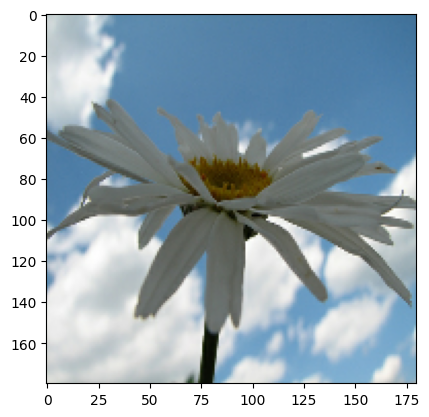

Actual Class: daisy
Predicted Class: sunflowers


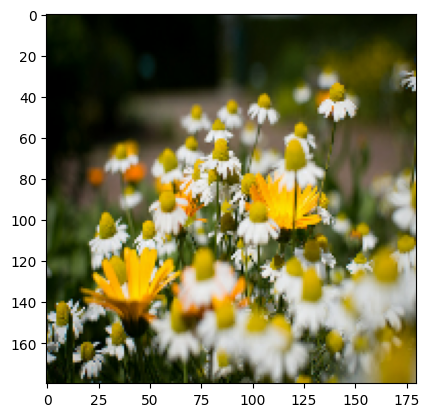

Actual Class: roses
Predicted Class: tulips


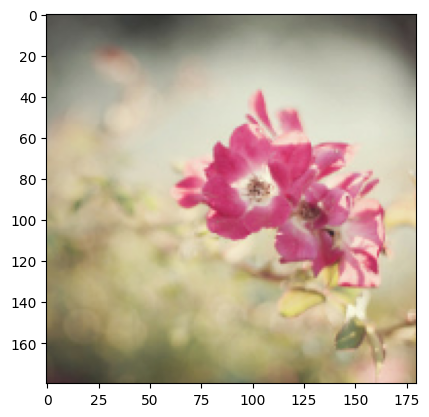

Actual Class: daisy
Predicted Class: dandelion


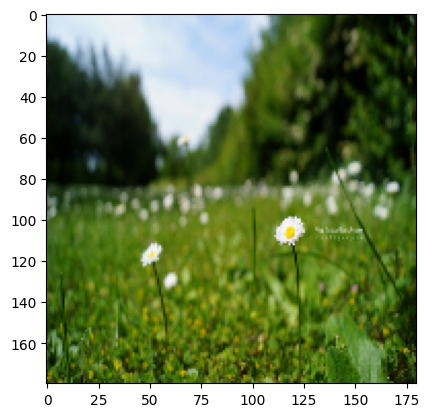

Actual Class: daisy
Predicted Class: dandelion


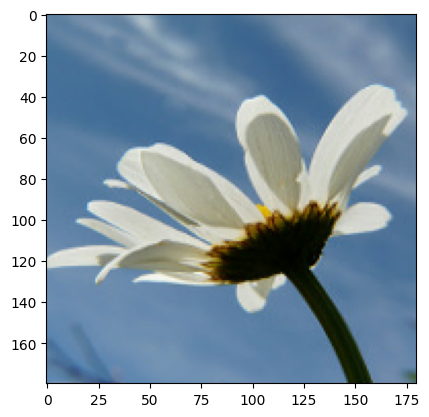

Actual Class: tulips
Predicted Class: daisy


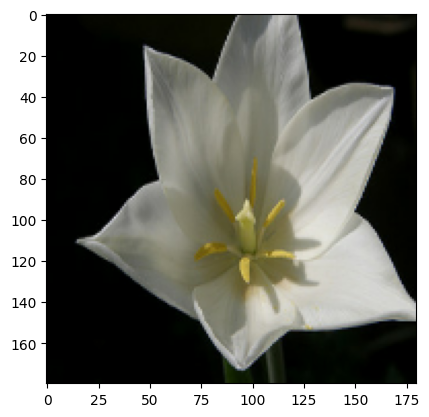

Actual Class: roses
Predicted Class: dandelion


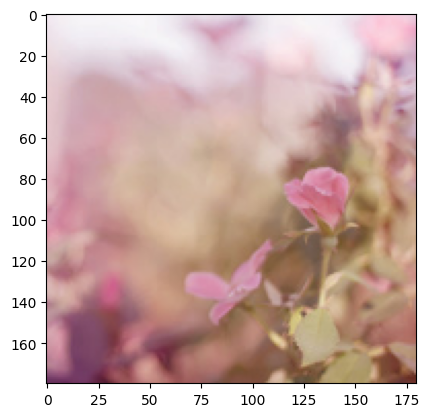

Actual Class: sunflowers
Predicted Class: dandelion


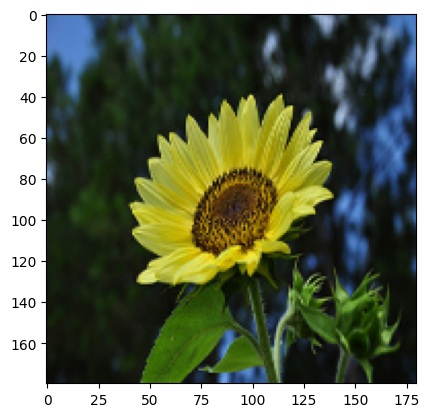

Actual Class: roses
Predicted Class: dandelion


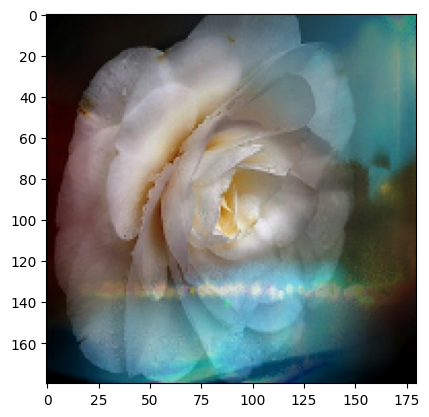

Actual Class: roses
Predicted Class: tulips


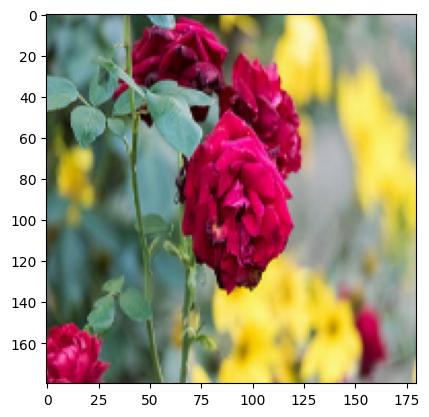

Actual Class: tulips
Predicted Class: dandelion


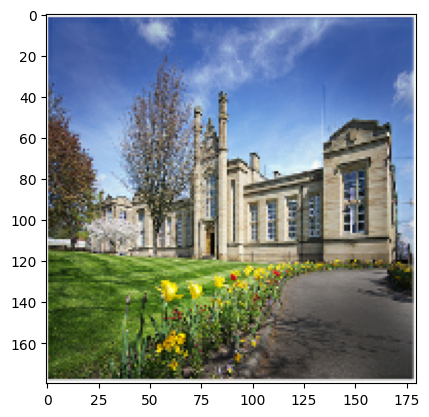

Actual Class: dandelion
Predicted Class: sunflowers


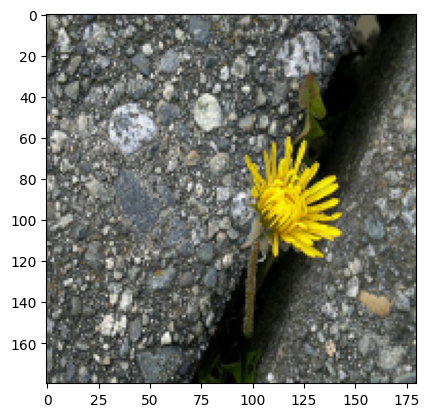

In [ ]:
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    for i in range(len(labels)):
        predicted_class = class_names[np.argmax(predictions[i])]
        actual_class = class_names[labels[i]]
        if predicted_class != actual_class:
            print("Actual Class:", actual_class)
            print("Predicted Class:", predicted_class)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.show()


1/1 [==============================] - 0s 291ms/step


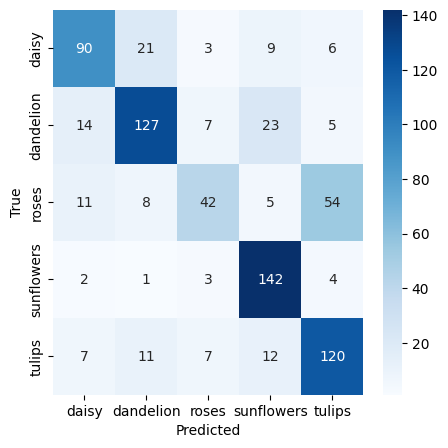

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(num_classes, num_classes))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
